In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import statistics
import itertools

%matplotlib inline

In [2]:
def generate_box_plots(runtime, parameters, snaps):
    for par in parameters:
        data = []
        label = []
        for snap in snaps:
            cpu = runtime[f'cpu_{snap}_{par}'][2:]
            gpu = runtime[f'gpu_{snap}_{par}'][2:]
            data.append(cpu)
            label.append(f'cpu_snaps_{snap}')
            data.append(gpu)
            label.append(f'gpu_snaps_{snap}')
        boxplots(data, label, par)
        if par == 'nettrain':
            data = []
            label = []
            for snap in snaps:
                cpu = np.array(runtime[f'cpu_{snap}_{par}'][2:])/int(30 / int(snap))
                gpu = np.array(runtime[f'gpu_{snap}_{par}'][2:])/int(30 / int(snap))
                data.append(cpu)
                label.append(f'cpu_snaps_{snap}')
                data.append(gpu)
                label.append(f'gpu_snaps_{snap}')
            boxplots(data, label, 'nettrain_per_epoch')

            
            
def boxplots(data, label, par):
    fig = plt.figure(figsize =(10, 6))
    ax = fig.add_subplot(111)
    # Creating axes instance
    bp = ax.boxplot(data, patch_artist = True,
                    notch = False, vert = 0)

    colors = ['tab:blue', 'tab:green', 'tab:blue', 'tab:green', 'tab:blue', 'tab:green']
    colors_median = ['red', 'orange', 'red', 'orange', 'red', 'orange']

    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)

    # changing color and linewidth of whiskers
    for whisker in bp['whiskers']:
        whisker.set(color ='#8B008B',
                        linewidth = 1.5,
                        linestyle =":")

    # changing color and linewidth of caps
    for cap in bp['caps']:
        cap.set(color ='#8B008B',
                    linewidth = 2)

    # changing color and linewidth of medians
    for median, color in zip(bp['medians'], colors_median):
        median.set(color = color,
                       linewidth = 3)

    # changing style of fliers
    for flier in bp['fliers']:
        flier.set(marker ='D',
                      color ='#e7298a',
                      alpha = 0.5)

    # x-axis labels
    ax.set_yticklabels(label, fontsize=16)
    ax.tick_params(axis='x', labelsize=16)
    if par == 'infsetup':
        ax.xaxis.set_major_formatter(FormatStrFormatter('%.5f'))
    elif par == 'inference':
        ax.xaxis.set_major_formatter(FormatStrFormatter('%.4f'))
    elif par == 'netsetup':
        ax.xaxis.set_major_formatter(FormatStrFormatter('%.4f'))
    else:
        ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))

    # Adding title
    plt.title(par, fontsize=16)

    # Removing top axes and right axes ticks
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

    # show plot
    plt.show(bp)

In [3]:
filehandler = open('NN_runtime.pkl', 'rb')
nn_runtime = pickle.load(filehandler)

In [4]:
for name, numbers in nn_runtime.items():
    print('Item:', name, 'Used', len(numbers), 'times')
    print('\tMEDIAN', statistics.median(numbers))
    print('\tMEAN  ', statistics.mean(numbers))
    print('\tMAX ', max(numbers))
    print('\tMIN ', min(numbers))

Item: cpu_1_datahandler Used 103 times
	MEDIAN 0.018954992294311523
	MEAN   0.01992882802648452
	MAX  0.07004237174987793
	MIN  0.01643085479736328
Item: cpu_1_netsetup Used 103 times
	MEDIAN 0.006482362747192383
	MEAN   0.006480154481906335
	MAX  0.0065708160400390625
	MIN  0.006419658660888672
Item: cpu_1_nettrain Used 103 times
	MEDIAN 8.079450368881226
	MEAN   8.081323896796958
	MAX  8.138461589813232
	MIN  8.039828777313232
Item: cpu_1_infsetup Used 103 times
	MEDIAN 0.00015401840209960938
	MEAN   0.00015757153335126857
	MAX  0.00017547607421875
	MIN  0.00015020370483398438
Item: cpu_1_inference Used 103 times
	MEDIAN 0.034301042556762695
	MEAN   0.034668477993567016
	MAX  0.03634333610534668
	MIN  0.0341947078704834
Item: cpu_2_datahandler Used 93 times
	MEDIAN 0.024669647216796875
	MEAN   0.02487988369439238
	MAX  0.03301429748535156
	MIN  0.021364927291870117
Item: cpu_2_netsetup Used 93 times
	MEDIAN 0.00647735595703125
	MEAN   0.006479409433180286
	MAX  0.00656437873840332
	M

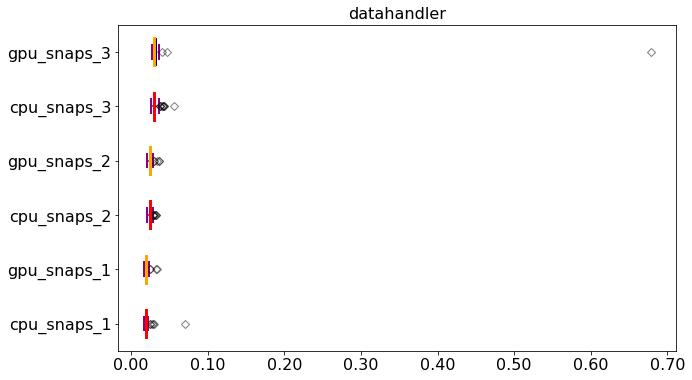

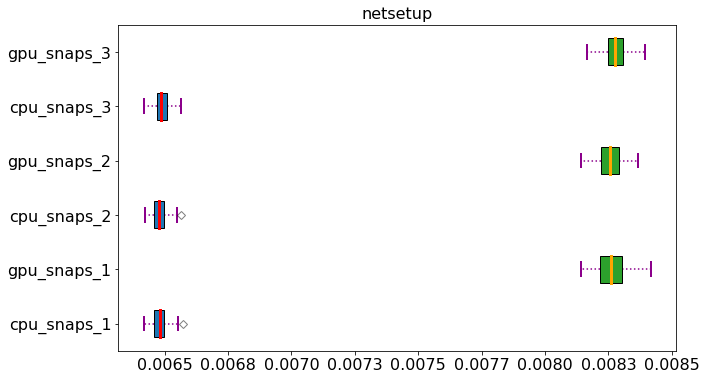

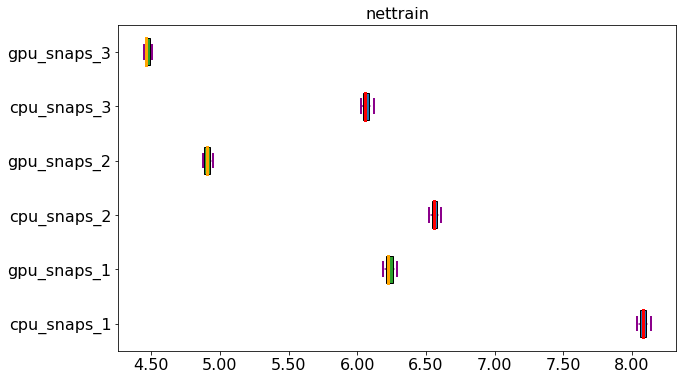

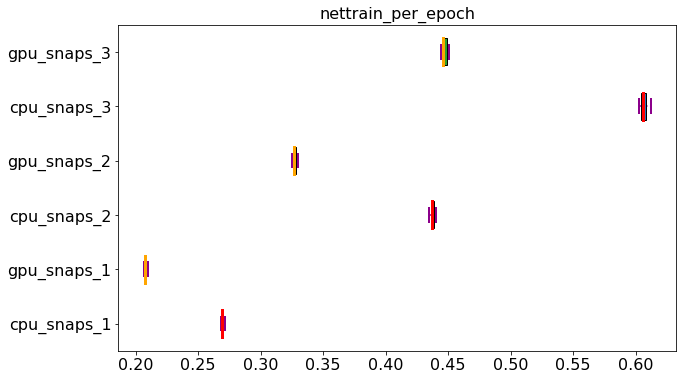

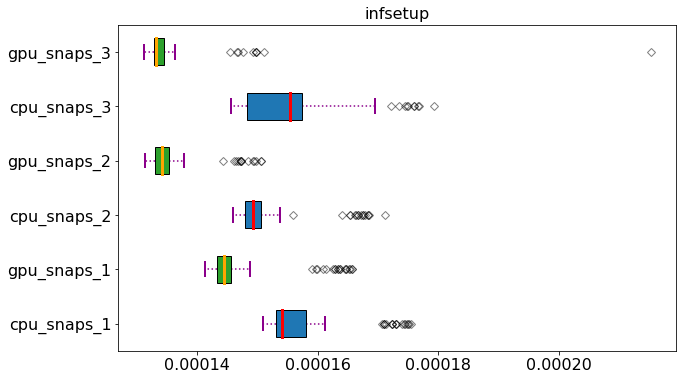

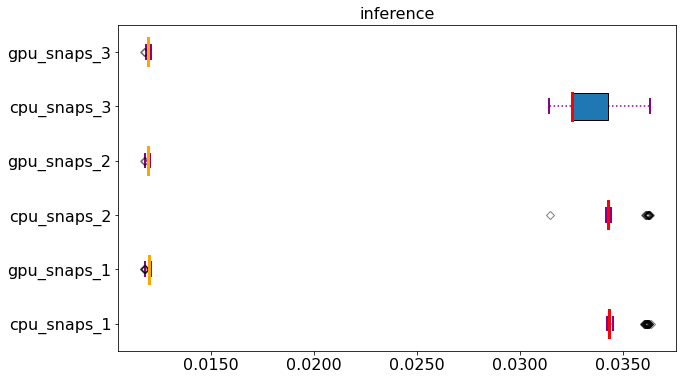

In [5]:
snaps = ["1", "2", "3"]
par = ["datahandler", "netsetup", "nettrain", "infsetup", "inference"]
generate_box_plots(nn_runtime, par, snaps)

In [6]:
filehandler = open('GP_runtime.pkl', 'rb')
gp_runtime = pickle.load(filehandler)

In [7]:
for name, numbers in gp_runtime.items():
    print('Item:', name, 'Used', len(numbers), 'times')
    print('\tMEDIAN', statistics.median(numbers))
    print('\tMEAN  ', statistics.mean(numbers))
    print('\tMAX ', max(numbers))
    print('\tMIN ', min(numbers))

Item: cpu_1_datahandler Used 103 times
	MEDIAN 0.037130117416381836
	MEAN   0.04173564216465626
	MAX  0.08110213279724121
	MIN  0.02732372283935547
Item: cpu_1_netsetup Used 103 times
	MEDIAN 0.0011773109436035156
	MEAN   0.0011960811985349193
	MAX  0.0014526844024658203
	MIN  0.001051187515258789
Item: cpu_1_infsetup Used 103 times
	MEDIAN 0.00015163421630859375
	MEAN   0.00015619889046381978
	MAX  0.00020313262939453125
	MIN  0.00013327598571777344
Item: cpu_1_inference Used 103 times
	MEDIAN 1.0104169845581055
	MEAN   1.011328683316129
	MAX  1.0284011363983154
	MIN  1.0056400299072266
Item: cpu_1_inference10 Used 103 times
	MEDIAN 0.16437554359436035
	MEAN   0.16441091981906336
	MAX  0.16486144065856934
	MIN  0.16400504112243652
Item: cpu_2_datahandler Used 93 times
	MEDIAN 0.04831123352050781
	MEAN   0.055058720291301766
	MAX  0.12497067451477051
	MIN  0.03833651542663574
Item: cpu_2_netsetup Used 93 times
	MEDIAN 0.0011639595031738281
	MEAN   0.0011837020997078188
	MAX  0.00142502

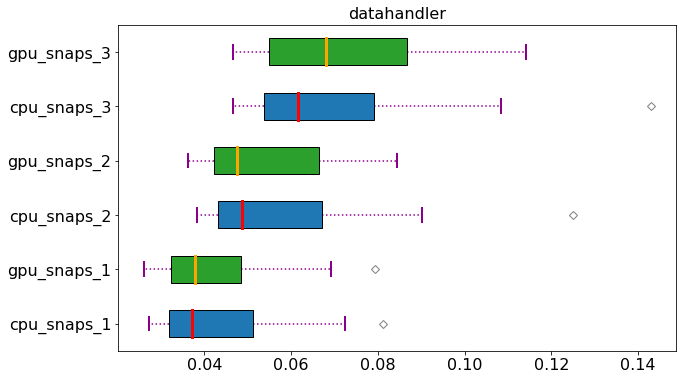

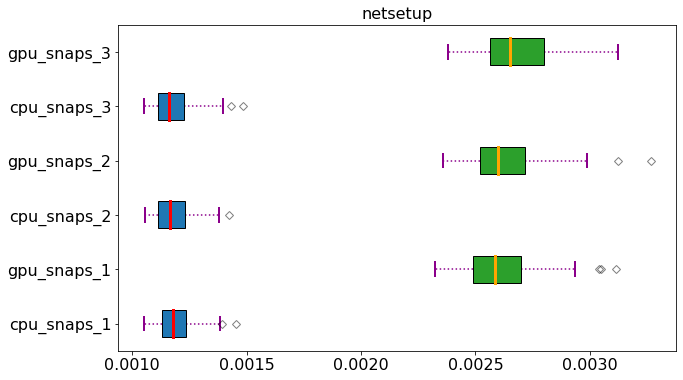

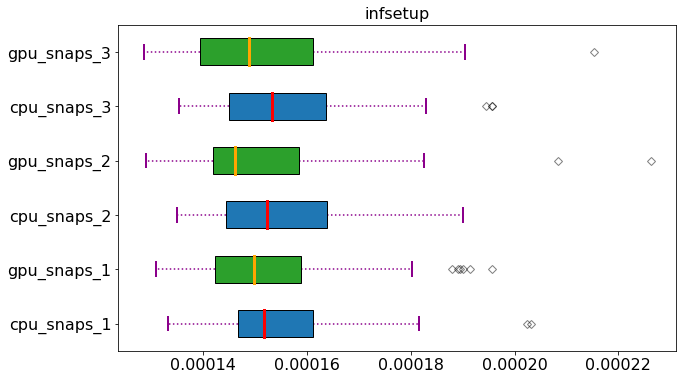

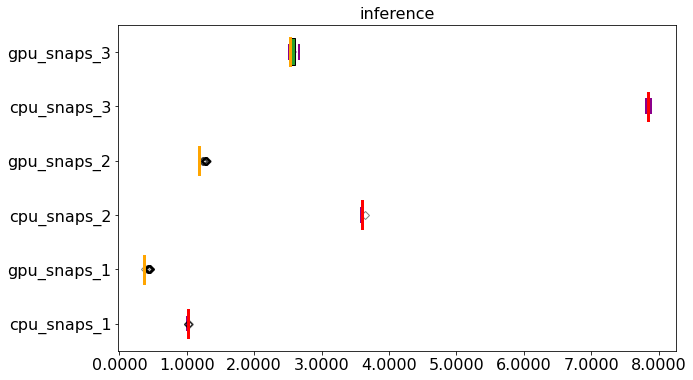

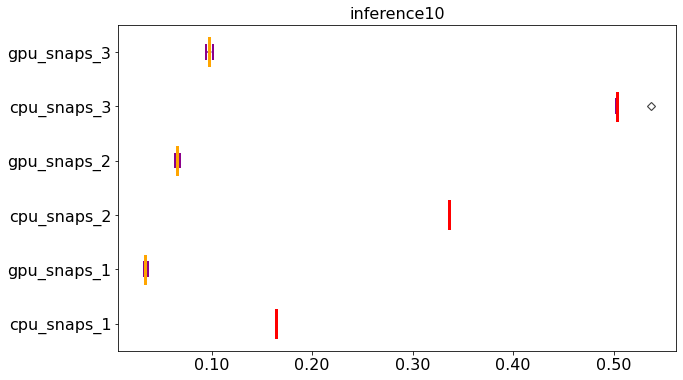

In [8]:
par = ["datahandler", "netsetup", "infsetup", "inference", "inference10"]
generate_box_plots(gp_runtime, par, snaps)

In [9]:
def generate_box_plots__nn_gp(nnruntime, gpruntime, parameters, snaps):
    for par in parameters:
        data_cpu = []
        labels_cpu = []
        data_gpu = []
        labels_gpu = []
        for snap in snaps:
            if par == 'train + inference':
                cpunn = (np.array(nn_runtime[f'cpu_{snap}_nettrain']) + np.array(nn_runtime[f'cpu_{snap}_inference']))[2:]
                gpunn = (np.array(nn_runtime[f'gpu_{snap}_nettrain']) + np.array(nn_runtime[f'gpu_{snap}_inference']))[2:]
                cpugp = gpruntime[f'cpu_{snap}_inference'][2:]
                gpugp = gpruntime[f'gpu_{snap}_inference'][2:]
            else:
                cpunn = nnruntime[f'cpu_{snap}_{par}'][2:]
                gpunn = nnruntime[f'gpu_{snap}_{par}'][2:]
                cpugp = gpruntime[f'cpu_{snap}_{par}'][2:]
                gpugp = gpruntime[f'gpu_{snap}_{par}'][2:]
                
            data_cpu.append(cpunn)
            labels_cpu.append(f'nn_snaps_{snap}')
            data_cpu.append(cpugp)
            labels_cpu.append(f'gp_snaps_{snap}')
            
            data_gpu.append(gpunn)
            labels_gpu.append(f'nn_snaps_{snap}')
            data_gpu.append(gpugp)
            labels_gpu.append(f'gp_snaps_{snap}')
            
        datas = [data_cpu, data_gpu]
        labels = [labels_cpu, labels_gpu]
        plot_titles = [f'CPU_{par}', f'GPU_{par}']
        
        for data, label, title in zip(datas, labels, plot_titles):
        
            fig = plt.figure(figsize =(10, 6))
            ax = fig.add_subplot(111)
            # Creating axes instance
            bp = ax.boxplot(data, patch_artist = True,
                            notch = False, vert = 0)

            colors = ['tab:blue', 'tab:green', 'tab:blue', 'tab:green', 'tab:blue', 'tab:green']
            colors_median = ['red', 'orange', 'red', 'orange', 'red', 'orange']

            for patch, color in zip(bp['boxes'], colors):
                patch.set_facecolor(color)

            # changing color and linewidth of
            # whiskers
            for whisker in bp['whiskers']:
                whisker.set(color ='#8B008B',
                            linewidth = 1.5,
                            linestyle =":")

            # changing color and linewidth of
            # caps
            for cap in bp['caps']:
                cap.set(color ='#8B008B',
                        linewidth = 2)

            # changing color and linewidth of
            # medians
            for median, color in zip(bp['medians'], colors_median):
                median.set(color = color,
                           linewidth = 3)

            # changing style of fliers
            for flier in bp['fliers']:
                flier.set(marker ='D',
                          color ='#e7298a',
                          alpha = 0.5)

            # x-axis labels
            ax.set_yticklabels(label, fontsize=16)
            ax.tick_params(axis='x', labelsize=16)
            if par == 'infsetup':
                ax.xaxis.set_major_formatter(FormatStrFormatter('%.5f'))
            elif par == 'netsetup':
                ax.xaxis.set_major_formatter(FormatStrFormatter('%.4f'))
            else:
                ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))

            # Adding title
            
            plt.title(title, fontsize=16)

            # Removing top axes and right axes
            # ticks
            ax.get_xaxis().tick_bottom()
            ax.get_yaxis().tick_left()

            # show plot
            plt.show(bp)

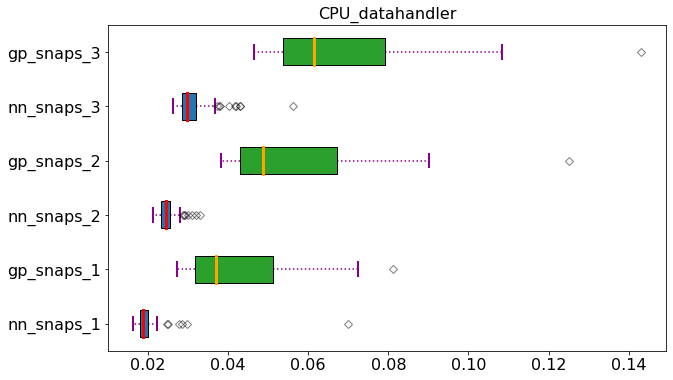

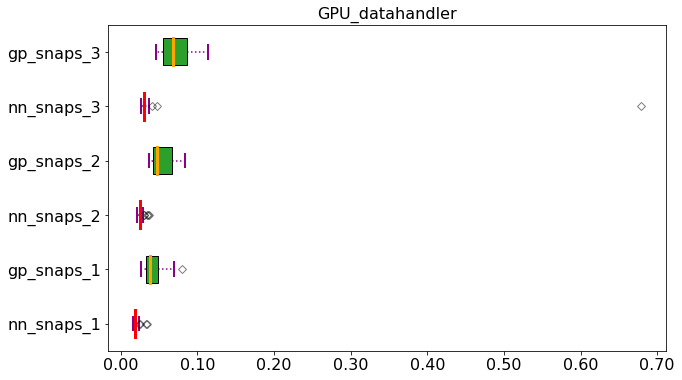

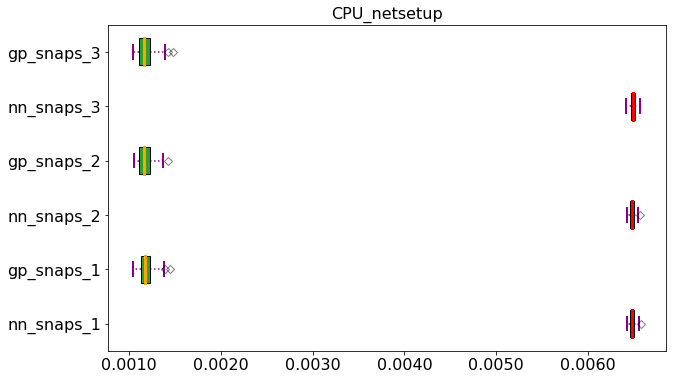

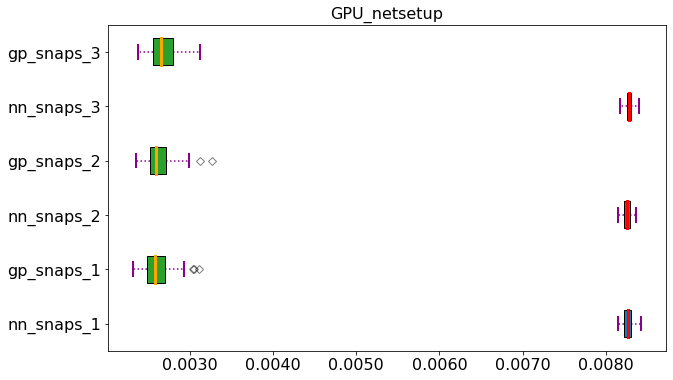

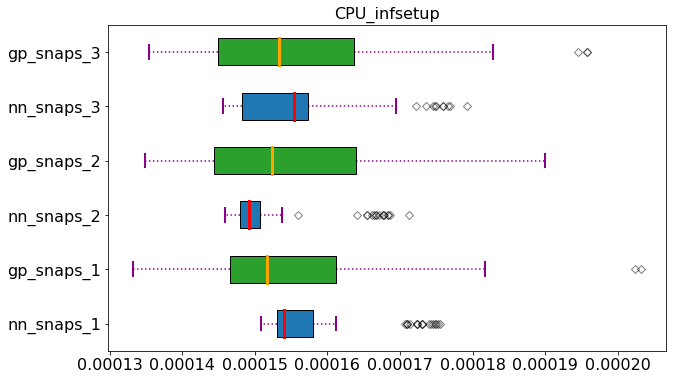

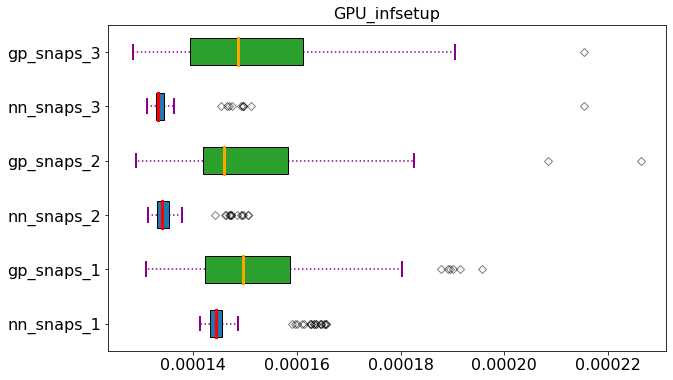

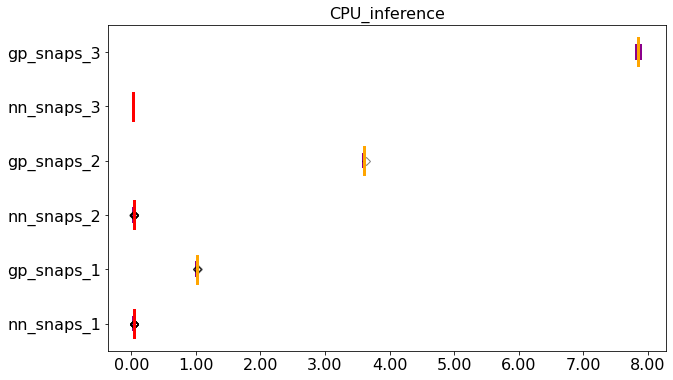

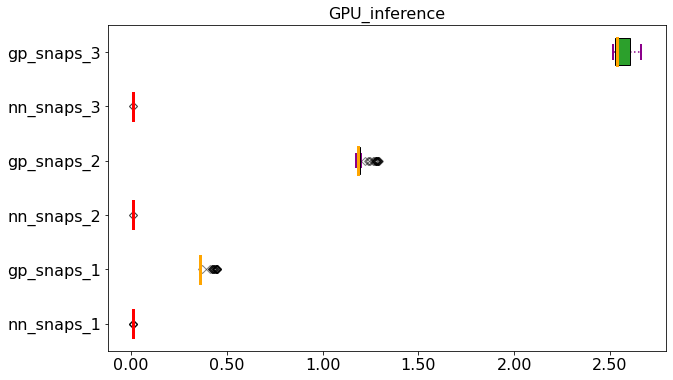

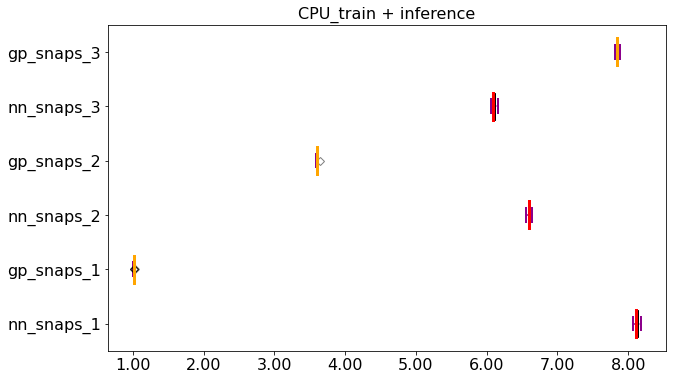

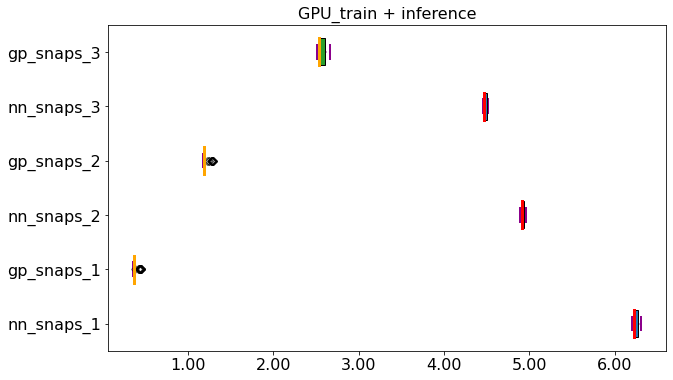

In [10]:
par = ["datahandler", "netsetup", "infsetup", "inference", "train + inference"]
generate_box_plots__nn_gp(nn_runtime, gp_runtime, par, snaps)